<a href="https://colab.research.google.com/github/bumcoding/PyTorch_Study/blob/main/02_PyTorchFundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

torch.__version__

'2.6.0+cu124'

In [2]:
torch.cuda.is_available()

True

# 1. Matrix Multiplication : 매트릭스 연산

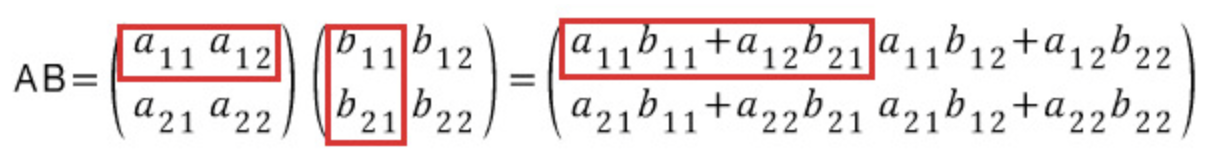

In [3]:
# element-wise multiplication
# m1과 m2

m1 = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(m1)
print(m1.shape)

m2 = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(m2)
print(m2.shape)

# 각 인덱스 위치의 값들의 매트릭스 곱셈
print(m1.mul(m2)) # dot product : 자신의 인덱스에 있는 값들을 곱셈 연산
print(m1*m2)

# 매트릭스 연산
print(m1@m2)
print(m1.matmul(m2))

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])
tensor([[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]])
tensor([[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]])
tensor([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])
tensor([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])


In [4]:
m1 = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
print(m1)
print(m1.shape)

m2 = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
print(m2)
print(m2.shape)

# print(m1*m2) : m1과 m2의 안쪽 shape이 같아야 연산이 가능하므로 에러!

m2 = m2.reshape(4,2) # 연산하는 shape을 맞춰줌
print(m1@m2) # (4, 4)(4, 2) > (4, 2)
print(m1.matmul(m2).shape)
print(m1.matmul(m2).reshape(4, 2))


tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])
torch.Size([4, 4])
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
torch.Size([2, 4])
tensor([[ 50,  60],
        [114, 140],
        [178, 220],
        [242, 300]])
torch.Size([4, 2])
tensor([[ 50,  60],
        [114, 140],
        [178, 220],
        [242, 300]])


# 2. Linear Layer

## raw layer를 직접 생성

In [5]:
w = torch.FloatTensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print(w.shape)

b = torch.FloatTensor([1, 1, 1])
print(b.shape)

# 선형 함수 정의
def linear(x, w, b):
  y = torch.matmul(x, w) + b # b는 브로드캐스팅 되어 자동으로 매트릭스에 맞게 연산
  return y

torch.Size([4, 3])
torch.Size([3])


In [6]:
x1 = torch.FloatTensor([1, 2, 3, 4]) # (4, )(4, 3) > (1, 4)(4, 3) > (3, )
print(x1.shape)

# w * x1 + b : torch.matmul(x, w) + b
print(linear(x1, w, b))

torch.Size([4])
tensor([71., 81., 91.])


In [7]:
# batch 처리

x2 = torch.FloatTensor([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]])
print(x2.shape)

print(linear(x2, w, b))
print(linear(x2, w, b).shape)

torch.Size([3, 4])
tensor([[23., 27., 31.],
        [45., 53., 61.],
        [67., 79., 91.]])
torch.Size([3, 3])


## nn.Module()

모든 뉴럴 네트워크 모형의 기본

우리가 정의하는 모든 뉴럴 네트워크 클래스는 nn.Module을 상속해야 함

각 layer의 함수, 신경망 구조를 정의할 때 사용

In [8]:
# torch.nn : nn를 설계할 때 필요한 대부분의 기본적인 layer 구조를 제공

import torch.nn as nn

In [9]:
class MyLinear1(nn.Module): # 모든 nn 클래스는 nn.Module을 상속함
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim

    self.w = torch.FloatTensor(input_dim, output_dim)
    self.b = torch.FloatTensor(output_dim)

  def forward(self, x): # 실제로 input을 받아서 네트워크를 통과시키고 결과를 return 함
    y = torch.matmul(x, self.w) + self.b
    return y

In [10]:
linear2 = MyLinear1(4, 3)
print(linear2)

y = linear2(x2)
print(y.size())

MyLinear1()
torch.Size([3, 3])


In [11]:
for p in linear2.parameters():
  print(p)

In [12]:
class MyLinear1(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim

    self.w = torch.FloatTensor(input_dim, output_dim)
    self.b = torch.FloatTensor(output_dim)

  def forward(self, x):
    y = torch.matmul(x, self.w) + self.b
    return y

class MyLinear2(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim

    self.w = nn.Parameter(torch.FloatTensor(input_dim, output_dim))
    self.b = nn.Parameter(torch.FloatTensor(output_dim))

  def forward(self, x):
    y = self.linear(x)
    return y

In [13]:
linear2 = MyLinear2(4, 3)

for p in linear2.parameters():
  print(p)

Parameter containing:
tensor([[2.1707e-18, 7.0952e+22, 1.7748e+28],
        [1.8176e+31, 7.2708e+31, 5.0778e+31],
        [3.2608e-12, 1.7728e+28, 7.0367e+22],
        [2.1715e-18, 2.1008e+20, 4.1915e+21]], requires_grad=True)
Parameter containing:
tensor([9.0943e-25, 0.0000e+00, 9.0944e-25], requires_grad=True)
